# Spotify Song Attributes Exploratory Data Analysis (EDA)
- Import Dataset
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree)
- Predict target using the trained classifier

In [50]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

For every track on their platform, Spotify provides data for thirteen *Audio Features*.  

* **Danceability**: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

* **Valence**: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **Energy**: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

* **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

* **Speechiness**: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

* **Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

* **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

* **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

* **Key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

* **Mode**: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **Duration**: The duration of the track in milliseconds.

* **Time Signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

> Our **target** is `1` if the user liked the song and `0` otherwise.

In [51]:
from google.colab import files 
uploaded_files = files.upload() # upload file
import io
data = io.BytesIO(uploaded_files['spotify_data.csv']) # read file

# load as a data frame
data = pd.read_csv(data)
data.head()

# another way to read data if you have already uploaded csv file to google colab session storage: 
# data = pd.read_csv('spotify_data.csv')
# data.head()

Saving spotify_data.csv to spotify_data (1).csv


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [52]:
# get basic stats for numerical columns
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [53]:
# Custom Color Palette 
red_blue = ['#19B5FE','#EF4836']
pallete = sns.color_palette(red_blue)
sns.set_palette(pallete)
sns.set_style('white')

In [54]:
# define function to split the values of an audio  feature depending on whether
# the song is liked (positive) or not (negative)
# i.e. whether target == 1 (positive) or 0 (negative)
def split_pos_neg(data, feature_name):
  pos = data[data['target']== 1][feature_name]
  neg = data[data['target']== 0][feature_name]
  return pos, neg

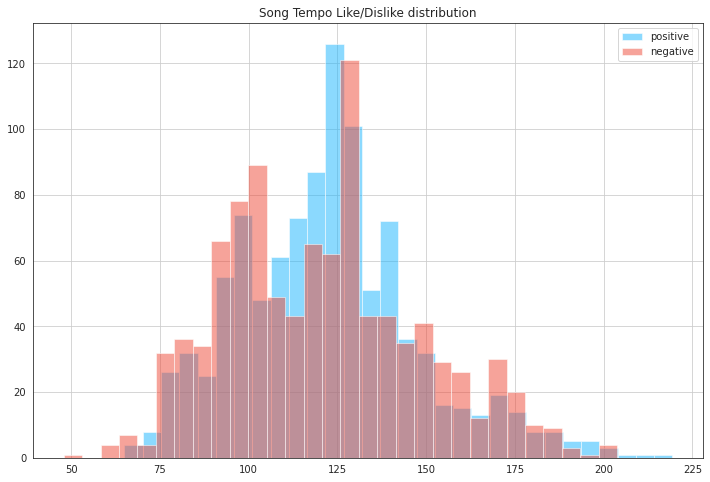

In [55]:
# split tempo based on whether song is liked or not
pos_tempo, neg_tempo = split_pos_neg(data, 'tempo')

# plot it in an overlapping histogram
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like/Dislike distribution')
pos_tempo.hist(alpha=0.5,bins=30,label='positive') # alpha sets transparency level
neg_tempo.hist(alpha=0.5,bins=30,label='negative')
plt.legend()
plt.show()

In [56]:
# define the names of the features to plot
feature_names = ['danceability', 'duration_ms', 'loudness', 
                 'speechiness', 'valence', 'energy',
                 'acousticness', 'key', 'instrumentalness']

<ipython-input-57-7988f3837621>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_ = fig2.add_subplot(plot_index)


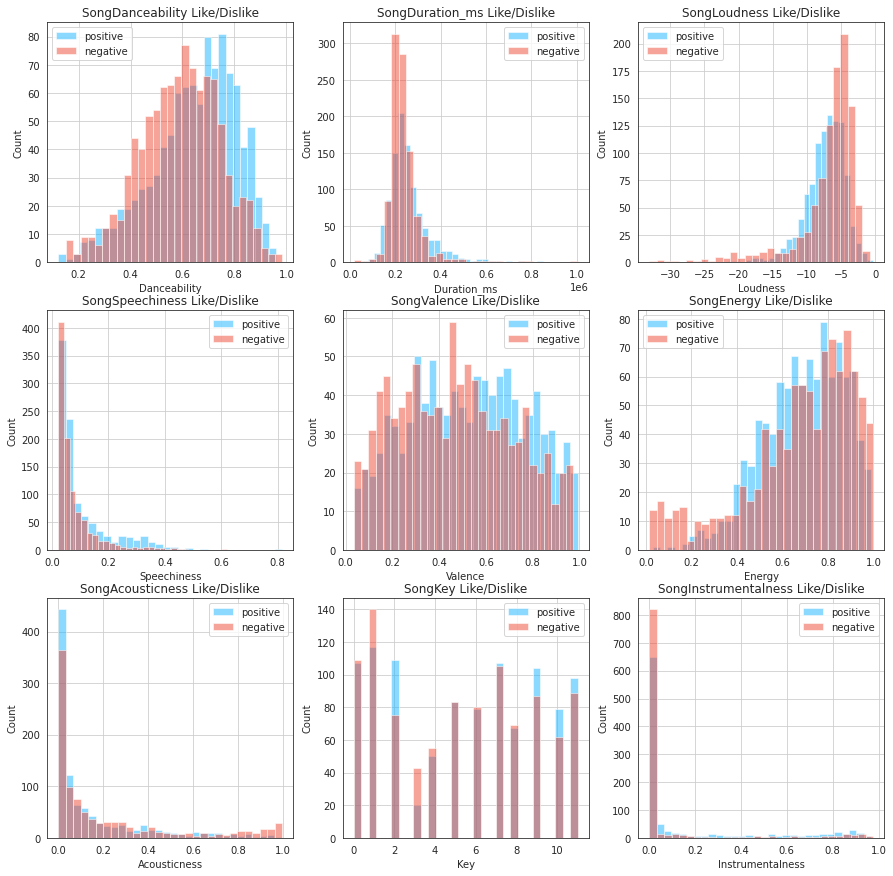

In [57]:
fig2 = plt.figure(figsize=(15,15))

plot_index = 331 # 3x3 plots, plot #1

for feature in feature_names:
  pos, neg = split_pos_neg(data, feature)

  ax = fig2.add_subplot(plot_index)
  ax.set_xlabel(feature.capitalize())
  ax.set_ylabel('Count')
  ax.set_title('Song' + feature.capitalize() +' Like/Dislike')

  pos.hist(alpha=0.5,bins=30, label='positive')
  ax_ = fig2.add_subplot(plot_index)
  neg.hist(alpha=0.5,bins=30, label='negative')
  plt.legend()

  plot_index = plot_index + 1

In [58]:
# create instance of decision tree classifier
# set min_samples_split to 100 to avoid overfitting and limit iteration
c = DecisionTreeClassifier(min_samples_split=100)

In [59]:
# Split data into training (85%) and testing (15%)
X_train, X_test, y_train, y_test = train_test_split(data[feature_names], # X (you may want to include other features as well)
                                                    data.target,         # y
                                                    test_size=0.15,      
                                                    random_state = 42)    # consistent split

In [60]:
# use the training set to train the model
c.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [61]:
import imageio,io
import pydotplus

In [62]:
# write function to plot the decision tree
def show_tree(tree, features, path):
  # make file stream to read/write
  f = io.StringIO()
  # export the graph into dot format and save it to the io stream
  export_graphviz(tree, out_file=f, feature_names=feature_names, class_names=['0','1'],
                  filled=True, rounded=True) # for nicer visualization
  # read the dot data and trnasform it into a png, then save it to path
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  # read the png image saved at path
  img = imageio.imread(path)
  # plot the png image in the notebook
  plt.rcParams['figure.figsize'] = (20,20)
  plt.imshow(img)

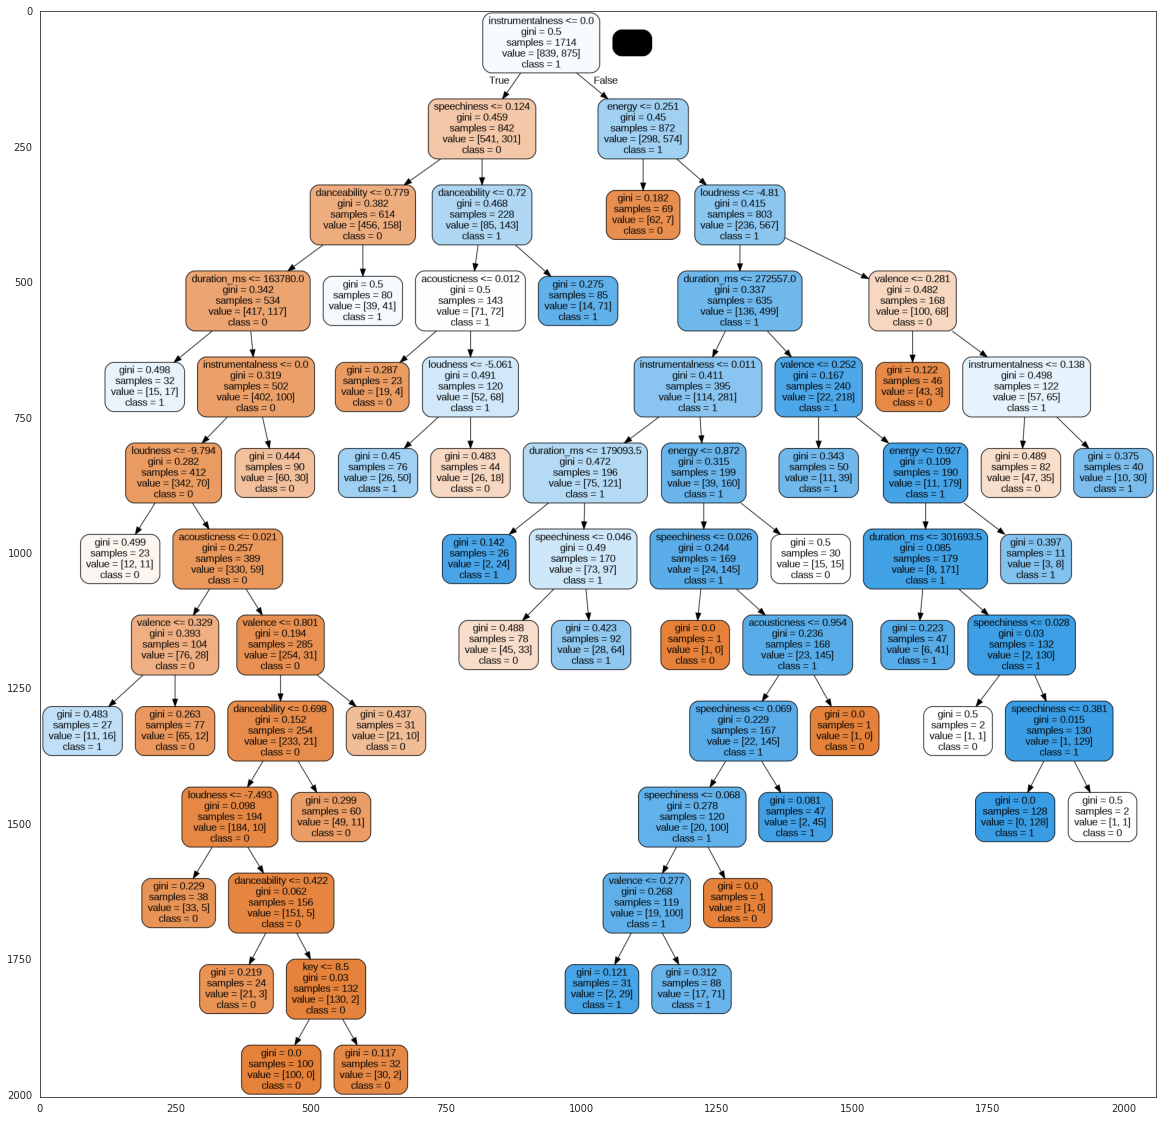

In [63]:
# plot the decision tree
show_tree(c,feature_names,'decision_tree')

In [64]:
# predict target of testing set
y_pred = c.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

# get the accurancy
accuracy  = accuracy_score(y_test,y_pred)

In [66]:
print("Accuracy using Decision Tree: ",accuracy*100 )

Accuracy using Decision Tree:  69.3069306930693


# Optimization
We observe the tree is unpruned. It is hard to understand.  
More importantly, it is ⚠ not optimized ⚠.  
To optimize it, we can tune the different optimization parameteres of the decision tree model before fitting it.

* **criterion** : optional (default=`"gini"`) or Choose attribute selection measure: This parameter allows us to use the different attribute selection measure. Supported criteria are `"gini"` for the Gini index and `"entropy"` for the information gain.
* **splitter** : string, optional (default=`"best"`) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and `"random"` to choose the best random split.
* **max_depth** : int or None, optional (default=`None`) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than `min_samples_split` samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [74]:
# create instance of decision tree classifier
# set min_samples_split to 100 to avoid overfitting and limit iteration
# set criterion to entropy
# set max depth to 7
clf = DecisionTreeClassifier(min_samples_split=100, 
                             criterion='entropy', 
                             max_depth=7)

# train the model
clf.fit(X_train,y_train)

# predict the values of the testing
clf_pred = clf.predict(X_test)

# get the accurancy
clf_accuracy  = accuracy_score(y_test,clf_pred)

print("Accuracy with parameter tuning: ", clf_accuracy*100 )

Accuracy with parameter tuning:  72.27722772277228


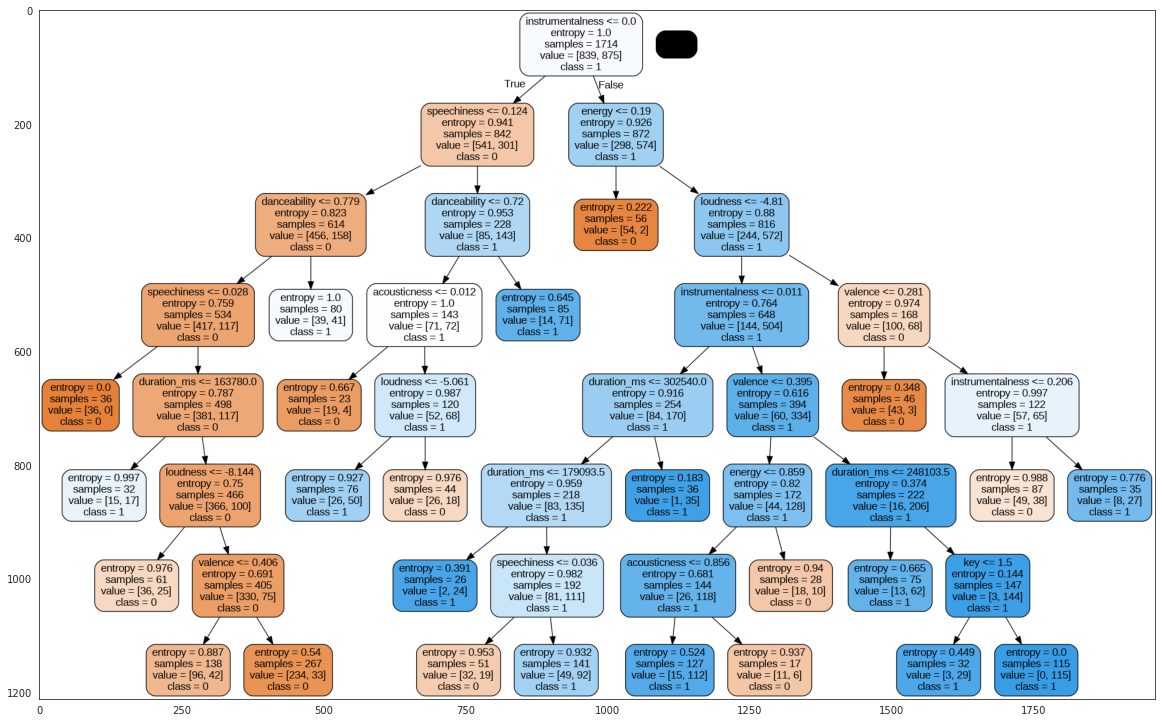

In [75]:
# plot the optimized decision tree
show_tree(clf,feature_names,'optimized_decision_tree')

# Random Forest
Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree.

#### Ensemble Method:
Number of decision trees are created. Sampling is done from entire dataset to randomly include set of features everytime a decision tree is created. And prediction is made based on aggregate result of all decision trees.
This helps in reducing over-fitting and improving prediction accuracy. 

[read more about this technique on this IBM webpage](https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.)

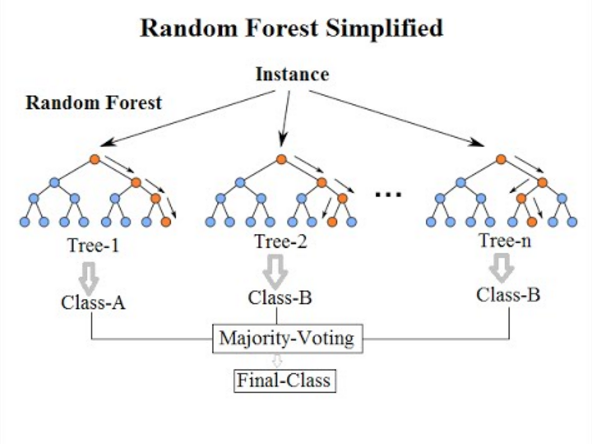

In [69]:
# Quick display of image form wikipedia
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png')


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# create instance of random forest classifier
# set min_samples_split as 10 which maximizes the prediction accuracy in our case
# set criterion to entropy
# set max depth to 20
# set random state to 0 to get some result everytime
rf = RandomForestClassifier(min_samples_split=10, criterion="entropy", 
                            max_depth=20, random_state=0)

# train model
rf.fit(X_train,y_train)

# predict testing data using model
rf_pred = rf.predict(X_test)

# get the accurancy
rf_accuracy  = accuracy_score(y_test,rf_pred)

print("Accuracy with parameter tuning: ", rf_accuracy*100 )

Accuracy with parameter tuning:  78.54785478547855


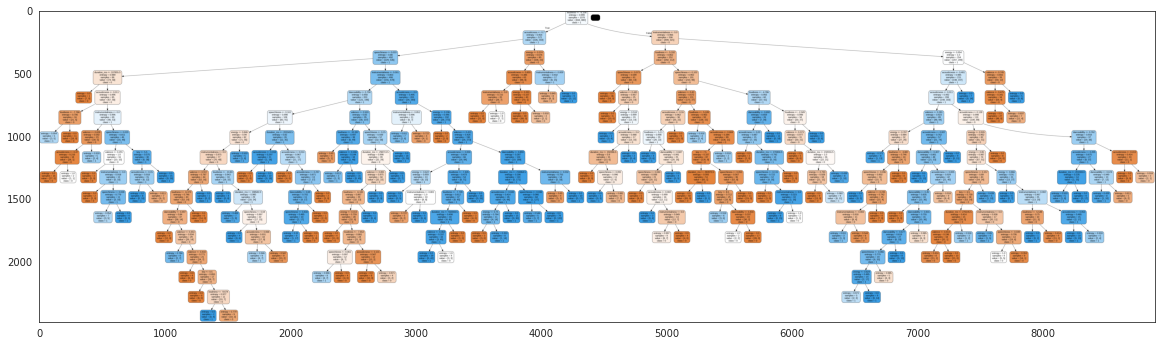

In [71]:
# view sample tree from the forest
show_tree(rf.estimators_[0],feature_names,'random_forest')